In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv('IranianChurn.csv')
data.head(25)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


In [75]:
print(data.isnull().sum())

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.2500

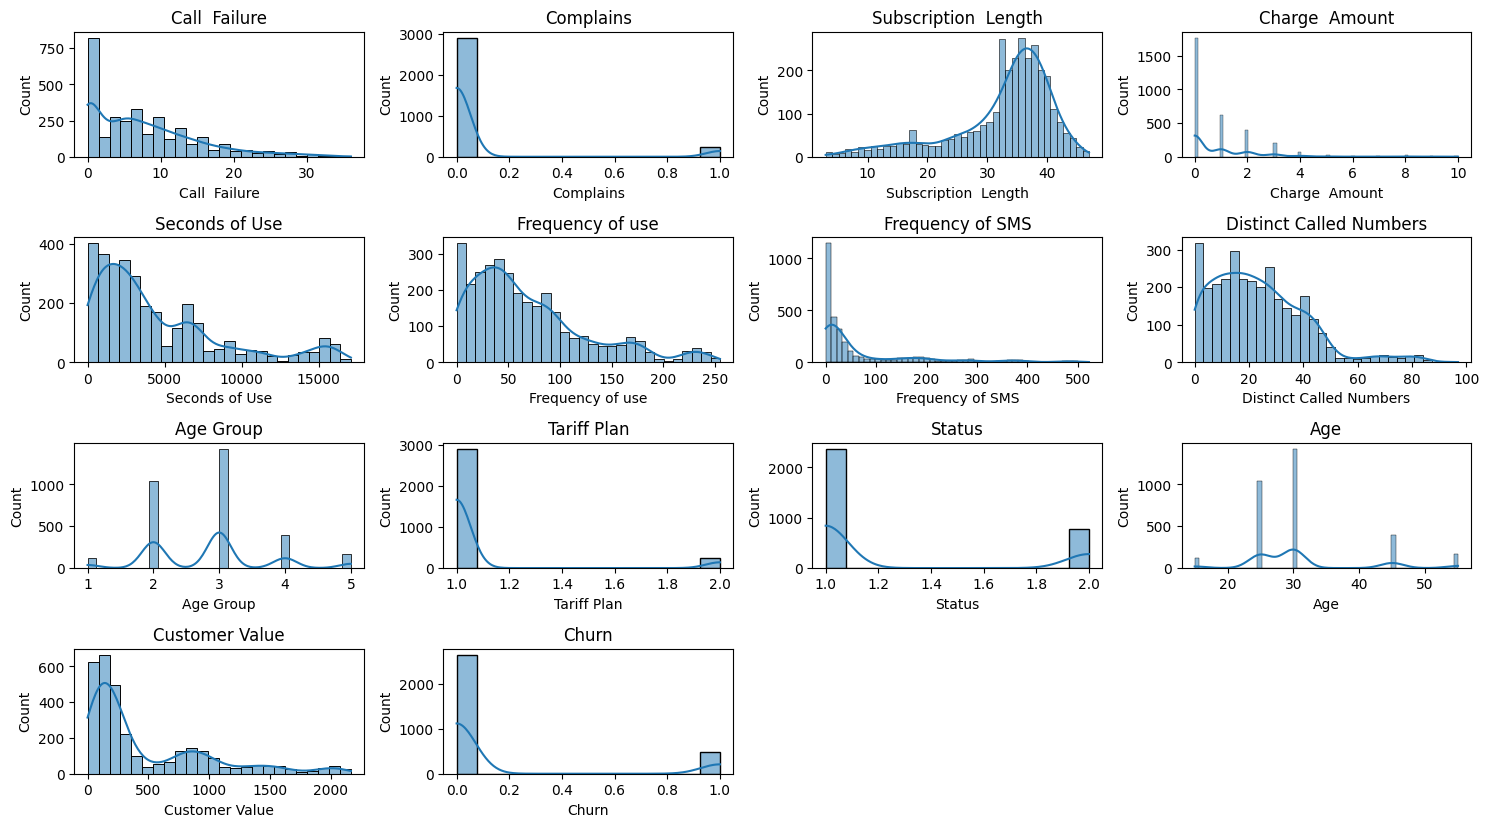

In [76]:
# خلاصه آمار توصیفی
print(data.describe())

# بررسی توزیع ستون‌های عددی

num_cols = data.select_dtypes(include=[int, float]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
target_col = 'Churn'
X_train, X_test, y_train, y_test = train_test_split(data.drop(target_col, axis=1), data[target_col], test_size=0.2, random_state=42)


In [78]:
# جایگزینی مقادیر بی‌نهایت در ستون Status
max_value = data['Status'].max()
data['Status'].replace([float('inf'), -float('inf')], max_value, inplace=True)


In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ایجاد یک مدل رگرسیون لوجستیک
model = LogisticRegression()

# تعریف پارامترهای مختلف برای تنظیم
param_grid = {'C': [0.1, 1, 10, 100]}

# ایجاد یک جستجوی شبکه‌ای برای تنظیم پارامترها
grid_search = GridSearchCV(model, param_grid, cv=5)

# آموزش مدل با تنظیم پارامترها
grid_search.fit(X_train, y_train)

# دریافت بهترین پارامترها و بهترین مدل
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# پیش‌بینی روی مجموعه آزمایش
y_pred = best_model.predict(X_test)

# محاسبه دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print("بهترین پارامترها:", best_params)
print("دقت مدل:", accuracy)

C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

بهترین پارامترها: {'C': 10}
دقت مدل: 0.8365079365079365


C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [105]:
from sklearn.metrics import confusion_matrix

# محاسبه ماتریس اشتباهات
conf_matrix = confusion_matrix(y_test, y_pred)
print("ماتریس اشتباهات:")
print(conf_matrix)

C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

ماتریس اشتباهات:
[[498  22]
 [ 81  29]]


C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

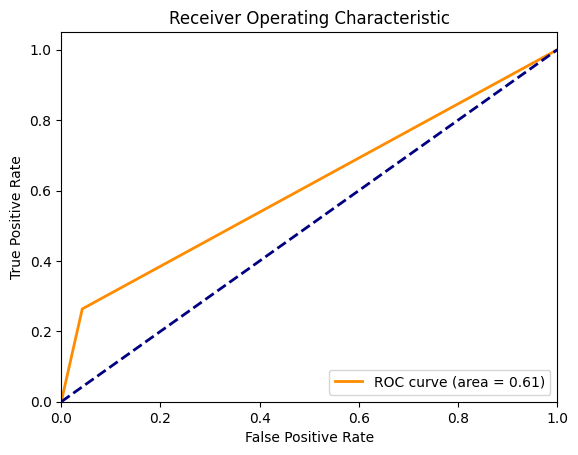

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# محاسبه مقادیر کاذب مثبت و درست مثبت برای تنظیم آستانه
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# محاسبه AUC
roc_auc = auc(fpr, tpr)

# رسم منحنی ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [97]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# چاپ امتیازهای اعتبارسنجی متقاطع
print("امتیازهای اعتبارسنجی متقاطع:", cv_scores)
print("میانگین دقت:", cv_scores.mean())

C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MINA\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

امتیازهای اعتبارسنجی متقاطع: [0.86507937 0.8452381  0.85912698 0.84920635 0.86309524]
میانگین دقت: 0.8563492063492063


In [138]:
def predict_churn(data):
    predictions = best_model.predict(data)
    return predictions

# مثال استفاده از تابع predict_churn()
new_data = pd.DataFrame({
    'Call  Failure': [10, 5],
    'Complains': [3, 2],
    'Subscription  Length': [24, 12],
    'Charge  Amount': [5000, 3000],
    'Seconds of Use': [1000, 500],
    'Frequency of use': [5, 3],
    'Frequency of SMS': [20, 10],
    'Distinct Called Numbers': [5, 3],
    'Age Group': ['1', '2'],
    'Tariff Plan': ['1', '2'],
    'Status': [1, 2],
    'Age': [30, 25],
    'Customer Value': [200, 150]
})

predictions = predict_churn(new_data)
print("پیش‌بینی ریزش مشتریان:", predictions)

پیش‌بینی ریزش مشتریان: [0 0]
